In [25]:
%matplotlib widget

## Lecture Notes

## Problems

### Problem O4.1

Generate and plot the scattergram of 1000 pairs of random variables $Y=(Y_1, Y_2)$, having the
covariance matrix $K_1=[2, 1;1, 4]$ using the linear transformation of vector $X=(X_1, X_2)$ where  
**a)** $X_1$ and $X_2$ are independent random variables that are each uniform in the unit interval  
**b)** $X_1$ and $X_2$ are independent zero-mean, unit-variance Gaussian random variables  
Repeat the above exercise with the covariance matrix $𝐾_2 = [4, 1; 1, 4]$ 

Given a linear transformation of $X$ into $Y$

$$
Y=AX=\begin{bmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{bmatrix} \begin{bmatrix} X_1 \\ X_2 \end{bmatrix}
$$

We want $Cov(Y)=\Sigma$

$$Cov(Y)=A Cov(X) A^T$$

Since $Cov(X)=I$ we have $Cov(Y)=AA^T$

So we need a matrix such that $\Sigma=AA^T$

We define $A=Q\Lambda^{\frac{1}{2}}$

Then $Cov(Y)=AA^T=Q\Lambda^{\frac{1}{2}}(Q\Lambda^{\frac{1}{2}})^T=Q\Lambda Q^T=\Sigma$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
Sigmas = [[[2, 1],
          [1, 4]],
          [[4, 1],
          [1, 4]]
         ]

Covariance:
 [[2.00452665 1.        ]
 [1.         4.00581938]]
Covariance:
 [[4.01208474 1.        ]
 [1.         4.01342455]]


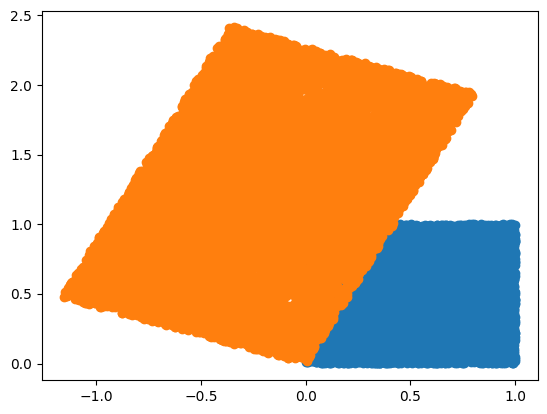

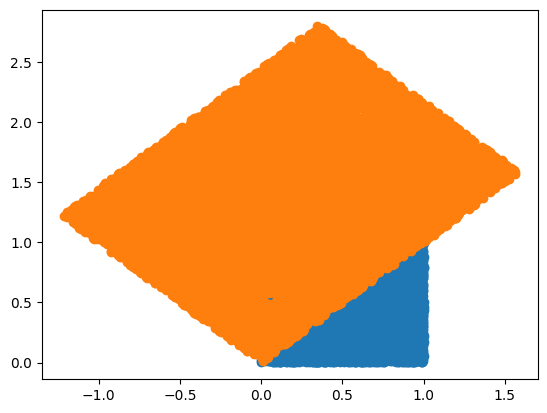

In [16]:
# Solution A

n_samples = 10000

X_a = np.zeros((2, n_samples))

X_a[0, :] = np.random.uniform(0, 1, n_samples)
X_a[1, :] = np.random.uniform(0, 1, n_samples)


for Sigma in Sigmas:
    eigvals, eigvecs = np.linalg.eigh(Sigma)
    Lambda_sqrt = np.diag(np.sqrt(eigvals))
    
    A = eigvecs @ Lambda_sqrt
    
    Y_a =  A @ X_a
    
    cov_Y_a = np.cov(Y_a) 
    
    print(f"Covariance:\n {cov_Y_a/cov_Y_a[0,1]}")
    
    plt.figure()
    plt.scatter(X_a[0,:], X_a[1,:])
    plt.scatter(Y_a[0,:], Y_a[1,:])

Covariance:
 [[4.01208474 1.        ]
 [1.         4.01342455]]
Covariance:
 [[4.01208474 1.        ]
 [1.         4.01342455]]


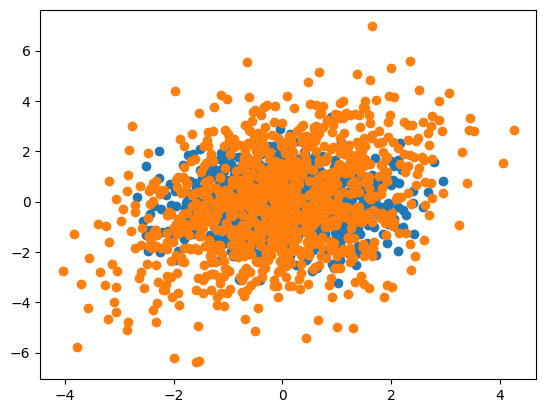

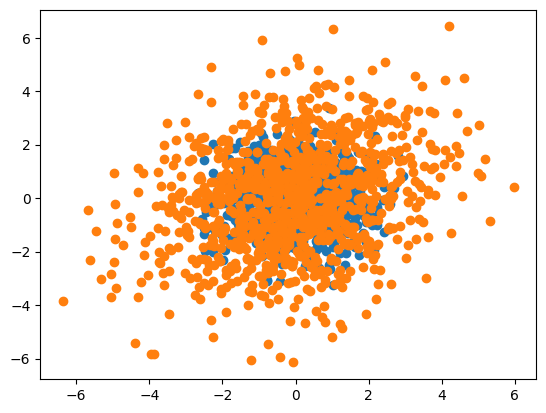

In [17]:
# Solution B

n_samples = 1000

cov_x_a = [[1,0],[0,1]]

X_a = np.random.multivariate_normal([0, 0], cov_x_a, n_samples).T

for Sigma in Sigmas:
    
    eigvals, eigvecs = np.linalg.eigh(Sigma)
    Lambda_sqrt = np.diag(np.sqrt(eigvals))
    
    A = eigvecs @ Lambda_sqrt
    
    Y_a =  A @ X_a
    
    print(f"Covariance:\n {cov_Y_a/cov_Y_a[0,1]}")
    
    plt.figure()
    plt.scatter(X_a[0,:], X_a[1,:])
    plt.scatter(Y_a[0,:], Y_a[1,:])

### Problem O4.2

Let X be the jointly Gaussian random variables with $\mu=[1, 0, 2]$ and covariance matrix $K_1 = \begin{bmatrix}
3/2 & 0 & 1/2 \\
0 & 1 & 0 \\
1/2 & 0 & 3/2
\end{bmatrix}$

**(a)** Find a linear transformation A that diagonalizes the covariance matrix  
**(b)** Generate 1000 triplets of Y=AX and plot the scattergrams in Matlab or Python for $𝑌_1$ and $𝑌_2$, $𝑌_1$ and $𝑌_3$, $𝑌_2$ and $𝑌_3$. Confirm that the scattergrams are as expected.

To obtain the matrix $A$ which decorrelates $X 

A random vector $X \in \mathbb{R^d}$ has the covariance matrix $ \mathbb{E}[(X-\mu_x)(X-\mu_x)^T]$

This is symmetrix and positive semidefinite. Since symmetric matrixes can always be diagonalized
$$
\Sigma=Q \Lambda Q^T
$$

Here $Q$ is the eigenvectors and $\Lambda$ is the eigenvalues.

We diagonalize the covariance matrix $Cov(x)=Q \Lambda Q^T$ and insert it into the covariance matrix of $Y$

Given the transformation $Y=Q^T(X-\mu_x)$

We calculate $Cov(Y)=\mathbb{E}[(Y-\mu_y)(Y-\mu_y)^T]=\mathbb{E}[YY^T]$ since $\mu_y=0$

We insert $Y=Q^T(X-\mu_x)$ and use the rule $(AB)^T=B^TA^T$ 

$Cov(Y)=Q^T(X-\mu_x)(Q^T(X-\mu_x))^T=Q^T(X-\mu_x)(X-\mu_x)^T Q=Q^TCov(X) Q$

We insert $Cov(x)=Q \Lambda Q^T$

$Cov(Y)=Q^TQ \Lambda Q^T) Q=\Lambda$

Since $Cov(X)$ is symmetric, $Q$ is orthonormal and $Q^TQ=I$

Covariance:
 [[ 0.98613118 -0.00987597 -0.06524133]
 [-0.00987597  1.32217077  0.02894707]
 [-0.06524133  0.02894707  3.26241885]]


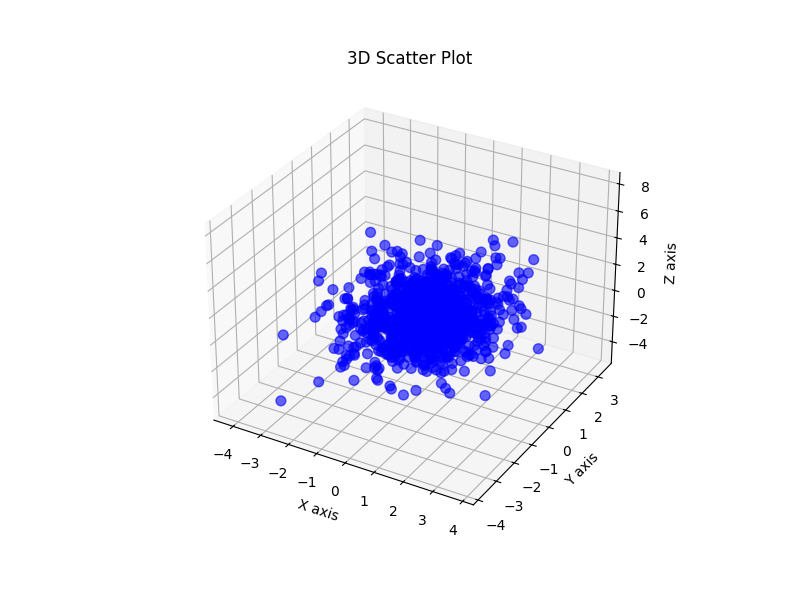

In [30]:
# Solution A + B

n_samples = 1000

cov_x = [[3/2, 0, 1/2],[0, 1, 0], [1/2, 0, 3]]

X = np.random.multivariate_normal([0, 0, 0], cov_x, n_samples).T

eigvals, eigvecs = np.linalg.eigh(cov_x)

A = eigvecs.T

Y = A @ X

cov_Y = np.cov(Y)

print(f"Covariance:\n {cov_Y}")

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[0,:], X[1,:], X[2,:], c='blue', alpha=0.6, s=50)

# Labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Scatter Plot')

plt.show()

### Problem O4.3

Let $X_1, X_2,...X_n$ be independent zero mean Gaussian random variables. Let $Y_k=(X_k+X_{k-1})/2 $that is, $Y_k$ is the moving average of pairs of values of. Assume $X_{-1}=0$

**(a)** Find the covariance matrix of the random variables $Y_k$  
**(b)** Use Matlab or Python to generate a sequence of 1000 samples $Y_1, Y_2,...,Y_n$. How would
you check that $Y_k$ have the correct covariance.

Repeat above for $Y_k=(X_k-X_{k-1})/2 $

#### a)

Using the linearity rule

If $Y=AX+b$ then $Cov(Y)=Cov(AX+b)=ACov(X)A^T$

#### Alternative

We define $Y_k=(X_k+X_{k-1})/2$

$Cov(Y_k, Y_j)=\frac{1}{4}\mathbb{E}[(X_k-X_{k-1})(X_j-X_{j-1})^T]=\frac{1}{4}\mathbb{E}[X_k X_j^T + X_k X_{j-1}^T + X_{k-1}^T X_j + X_{k-1} X_{j-1}^T]$

Since $(A+B)^T=A^T+B^T$

Here we have 4 different scenarios

$$
Cov(Y_k, Y_j) =
\begin{cases}
\frac{1}{2}Cov(x) & \text{if } j=k \\
\frac{1}{4}Cov(x) & \text{if } j = k+1 \\
\frac{1}{4}Cov(x) & \text{if } j = k-1 \\
0 & \text{else }
\end{cases}
$$

In [39]:
cov_x = np.array([[1,0, 0],[0,1, 0], [0, 0, 1]])

X = np.random.multivariate_normal([0, 0, 0], cov_x, n_samples).T

A = np.array([[1/2, 0, 0],
              [1/2, 1/2, 0],
              [0, 1/2, 1/2]])

Y = np.zeros((2, n_samples))

Y = A @ X

cov_Y = np.cov(Y)
cov_Y_est = A @ cov_x @ A.T
print(cov_Y)
print(cov_Y_est)

[[0.25478269 0.25424671 0.00831943]
 [0.25424671 0.49010139 0.25254704]
 [0.00831943 0.25254704 0.52199405]]
[[0.25 0.25 0.  ]
 [0.25 0.5  0.25]
 [0.   0.25 0.5 ]]


In [40]:
cov_x = np.array([[1,0, 0],[0,1, 0], [0, 0, 1]])

X = np.random.multivariate_normal([0, 0, 0], cov_x, n_samples).T

A = np.array([[-1/2, 0, 0],
              [1/2, -1/2, 0],
              [0, 1/2, -1/2]])

Y = np.zeros((2, n_samples))

Y = A @ X

cov_Y = np.cov(Y)
cov_Y_est = A @ cov_x @ A.T
print(cov_Y)
print(cov_Y_est)

[[ 0.25389004 -0.24943903 -0.00733117]
 [-0.24943903  0.49455401 -0.23856426]
 [-0.00733117 -0.23856426  0.4822719 ]]
[[ 0.25 -0.25  0.  ]
 [-0.25  0.5  -0.25]
 [ 0.   -0.25  0.5 ]]


### Misc Problem
